In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
pd.set_option('display.width', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.precision',3)

def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(14,6))
    sns.set(font_scale=1.4)

In [3]:
df = pd.read_csv('install.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

Our dataset contains 10841 samples with 13 columns. Let's review our data column by column. Let's start with App column

In [7]:
df['App'].nunique()

9660

As we can see most of the Apps are unique. 9660 out of 10481 Apps are unique.

In [8]:
df[df['App']=='Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [9]:
df[df['App']=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


For example, Facebook and Instagram have multiple rows with almost same information so we will remove multiple rows of the same Apps in our dataset and will kep only unique ones. 

In [10]:
df.drop_duplicates(subset='App', keep='first', inplace=True)

In [11]:
df.shape

(9660, 13)

In [12]:
df['App'].head()

0        Photo Editor & Candy Camera & Grid & ScrapBook
1                                   Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide Apps
3                                 Sketch - Draw & Paint
4                 Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

As we see, there are some signs such as **("&", "-", ",")** etc. We don't need those and can remove them 

## Removing Redundant Signs from App Names

In [13]:
import re
df['App'] = df['App'].map(lambda x: re.sub(r"[^\w\s]", "", x.title())) # Capitalize every word

We have capitalize every word and removed all punctuations/ signs  rather than words and numbers 

In [14]:
df['App'].head()

0         Photo Editor  Candy Camera  Grid  Scrapbook
1                                 Coloring Book Moana
2    U Launcher Lite  Free Live Cool Themes Hide Apps
3                                 Sketch  Draw  Paint
4                Pixel Draw  Number Art Coloring Book
Name: App, dtype: object

I believe this is better. Now we can check how many words there are in App Names

In [15]:
df['App_length'] = df['App'].map(lambda x: len(x.split()))
cols = df.columns.tolist()

In [16]:
cols.insert(1,'App_length') # We insert new column (App_length) after App column
cols.pop() # We removed the very last column name from the list
df = df[cols] # We have changed the column order in the dataframe

We have reordered the column orders. The App and App Names are together now.

In [17]:
df.head()

,App,App_length,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid Scrapbook,6,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring Book Moana,3,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite Free Live Cool Themes Hide Apps,9,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,6,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df.loc[df[['App_length']].idxmax()]

,App,App_length,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1451,591 Housing Transactions Renting Houses MiddleClass Houses New Cases RealTime Registration Villas Through The Sky Apartment Suites Mrt Buying A House Selling Prices Housing Mortgages,25,HOUSE_AND_HOME,4.1,24977,21M,"1,000,000+",Free,0,Everyone,House & Home,"August 1, 2018",3.5.9,4.0.3 and up


It is a little bit weird  but the longest App name has 25-word in it. What a cool idea to name the App with such a long name:)

In [19]:
df['App_length'].value_counts()

3     2285
2     2165
4     1907
5     1203
1      715
6      617
7      444
8      212
9       73
10      18
11       8
13       5
15       2
12       2
25       1
17       1
21       1
23       1
Name: App_length, dtype: int64

<Figure size 432x288 with 0 Axes>

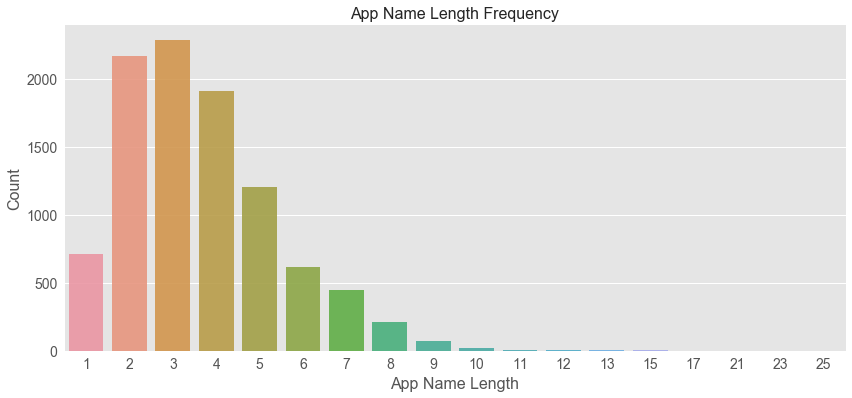

In [20]:
#sns.set(style="darkgrid")
visualization_settings()
plt.style.use("ggplot")
ax = sns.countplot(df['App_length'], alpha=0.9)
sns.despine()

# Label customizing
plt.ylabel('Count', fontsize=16)
plt.xlabel('App Name Length', fontsize=16)
plt.title("App Name Length Frequency", fontsize=16);

In [21]:
len(df[df['App_length']==3])

2285

Most common App name length is the ones with `3-word`. There  are 2537 3-word App names. It is almost 1 out of 4 in our database. Broadly speaking we can say that most of the App names are `less than 5 words`. Let's check now the most common 20 words in App names.

In [22]:
from collections import Counter
words = Counter("".join(df['App']).split()).items()
sorted_App_names = sorted(words, key=lambda x: x[1], reverse=True) # sorting on App name frequency

In [23]:
sorted_App_names[:20]

[('For', 517),
 ('And', 250),
 ('Free', 191),
 ('The', 147),
 ('By', 144),
 ('Of', 144),
 ('Video', 126),
 ('Live', 119),
 ('Mobile', 103),
 ('Photo', 99),
 ('To', 97),
 ('App', 86),
 ('Pro', 83),
 ('With', 81),
 ('Chat', 80),
 ('In', 74),
 ('A', 71),
 ('Dating', 65),
 ('Online', 64),
 ('News', 64)]

The most common 20 words in App Names are shown above.  But just a minute most of the top 20 words in App Names are pretty common words such as conjuctions or prepositoins in English. Let's clean them and check the names again.

In [24]:
from nltk.corpus import stopwords
stopword_list= stopwords.words('english')
sorted_App_names = [x for x in sorted_App_names if x[0].lower() not in stopword_list] # stop words are exclueded from App names

In [25]:
sorted_App_names[:20]

[('Free', 191),
 ('Video', 126),
 ('Live', 119),
 ('Mobile', 103),
 ('Photo', 99),
 ('App', 86),
 ('Pro', 83),
 ('Chat', 80),
 ('Dating', 65),
 ('Online', 64),
 ('News', 64),
 ('Launcher', 61),
 ('3D', 60),
 ('Camera', 54),
 ('Editor', 53),
 ('Car', 53),
 ('Tv', 50),
 ('Android', 49),
 ('Simulator', 48),
 ('Theme', 48)]

It makes much more sense now. As we can see the most common word in App Names is "**Free**".

In [26]:
# Let's review Category Column

In [27]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

* The very last category name is 1.9,  it cannot be a category name.  Something must wrong with it so we will dropp it.

In [28]:
df = df[df['Category']!='1.9']

In [29]:
df['Category'] = df['Category'].map(lambda x: x.title())

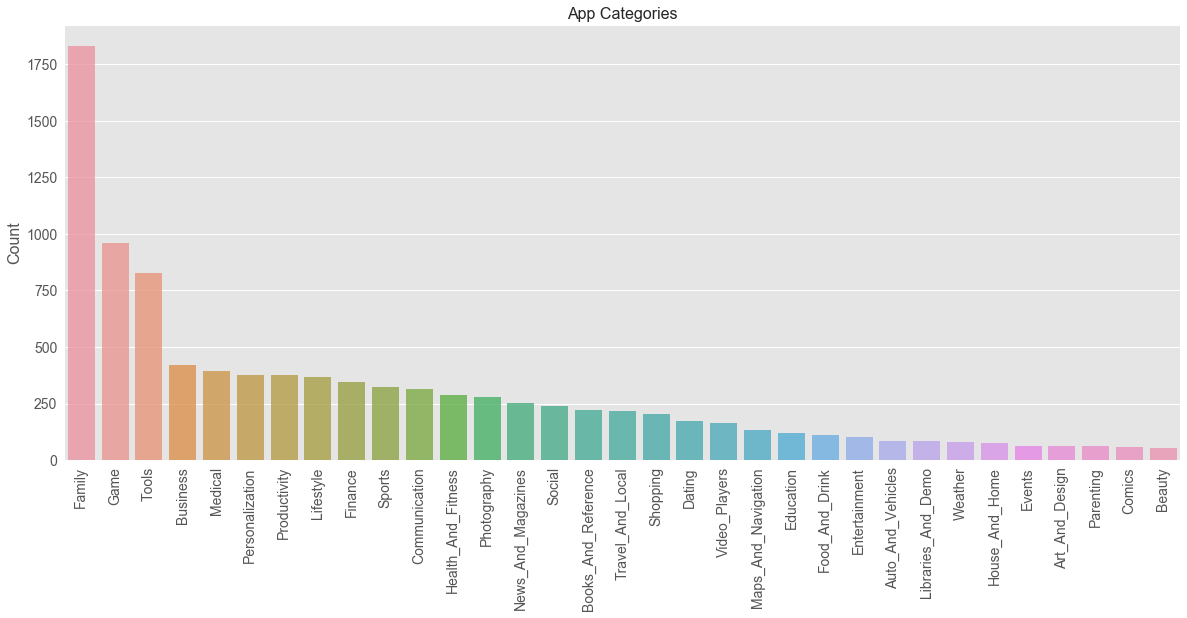

In [30]:
category_count  = df['Category'].value_counts();
plt.figure(figsize=(20,8))
sns.barplot(category_count.index, category_count.values, alpha=0.8)
plt.ylabel('Count', fontsize=16)
plt.title("App Categories", fontsize=16);
plt.xticks(rotation=90);

As seen from the graphic Family, Game and Tools categories are the top 3 ones, while Comics, Parenting and Beauty categories are the least used ones. 

**Let's check out Rating column**

In [31]:
df['Rating'].describe()

count    8196.000
mean        4.173
std         0.537
min         1.000
25%         4.000
50%         4.300
75%         4.500
max         5.000
Name: Rating, dtype: float64

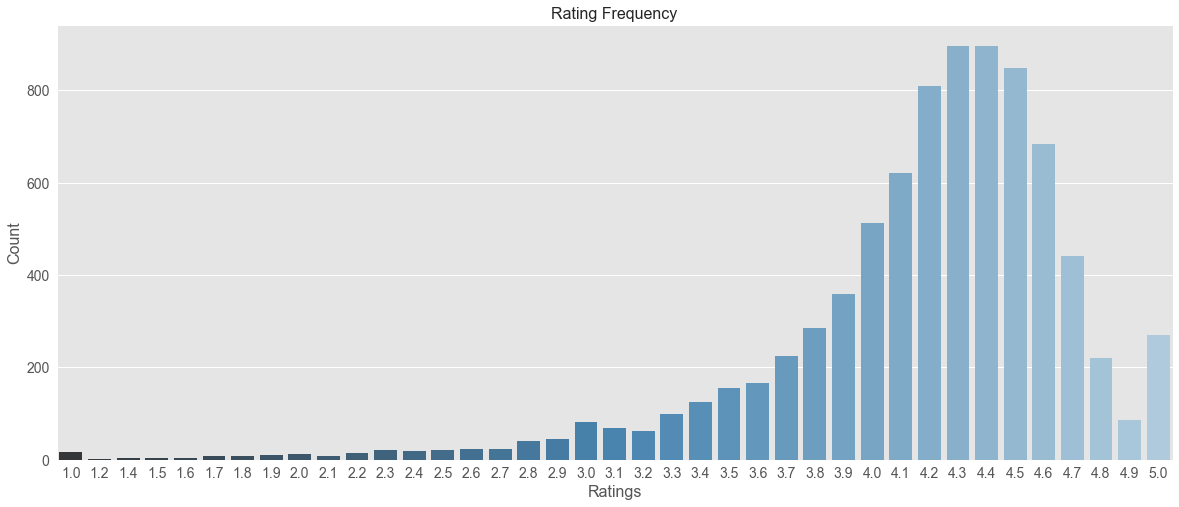

In [32]:
rating_count = df['Rating'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(rating_count.index, rating_count.values, palette="Blues_d");
plt.ylabel('Count', fontsize=16)
plt.xlabel('Ratings', fontsize=16)
plt.title("Rating Frequency", fontsize=16);

The rating mean is 4.2. We conclude that many people rate the apps more than 4 stars. 

In [33]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
Events                 4.436
Education              4.364
Art_And_Design         4.357
Books_And_Reference    4.345
Personalization        4.332
Parenting              4.300
Beauty                 4.279
Game                   4.247
Social                 4.247
Weather                4.243
Health_And_Fitness     4.243
Shopping               4.230
Sports                 4.216
Auto_And_Vehicles      4.190
Productivity           4.183
Comics                 4.181
Family                 4.180
Libraries_And_Demo     4.178
Food_And_Drink         4.172
Medical                4.167
Photography            4.157
House_And_Home         4.150
Entertainment          4.135
News_And_Magazines     4.122
Communication          4.121
Finance                4.116
Business               4.098
Lifestyle              4.093
Travel_And_Local       4.070
Video_Players          4.045
Tools                  4.040
Maps_And_Navigation    4.036
Dating                 3.970
Name: Rating, dtype: float64

Highest average mean rating score belongs to "Events" category which is around 4.44, while "Dating" category is with the least mean rating which is around 3.97. Although Events category does have only 64 Apps, it has the highest mean rating score. We can conclude that its user profile tend to give higher rating star. 

In [34]:
df.head()

,App,App_length,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid Scrapbook,6,Art_And_Design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring Book Moana,3,Art_And_Design,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite Free Live Cool Themes Hide Apps,9,Art_And_Design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,3,Art_And_Design,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,6,Art_And_Design,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Let's review Reviews columns**

In [35]:
type(df['Reviews'][0])

str

To make math opers on Reviews columns let's convert string type into integer

In [36]:
df['Reviews'] = df['Reviews'].map(lambda x: int(x))

In [37]:
df['Reviews'].describe()

count    9.659e+03
mean     2.166e+05
std      1.831e+06
min      0.000e+00
25%      2.500e+01
50%      9.670e+02
75%      2.940e+04
max      7.816e+07
Name: Reviews, dtype: float64

Some Apps has been rated almost 8 millions times. On the other hand some Apps has no review at all.

In [38]:
df[df['Reviews']>20000000]['App']

335            Messenger  Text And Video Chat For Free
336                                 Whatsapp Messenger
1654                                    Subway Surfers
1655                                  Candy Crush Saga
1660                                      Clash Royale
1670                                    Clash Of Clans
2544                                          Facebook
2545                                         Instagram
3665                                           Youtube
4005             Clean Master Space Cleaner  Antivirus
7536    Security Master  Antivirus Vpn Applock Booster
Name: App, dtype: object

The above applications have been reviewed more than 20 million times. 

In [39]:
df.loc[df[['Reviews']].idxmax()]

,App,App_length,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,1,Social,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


**Facebook** is the most rated application in our dataset with more than **78 million** reviews.****

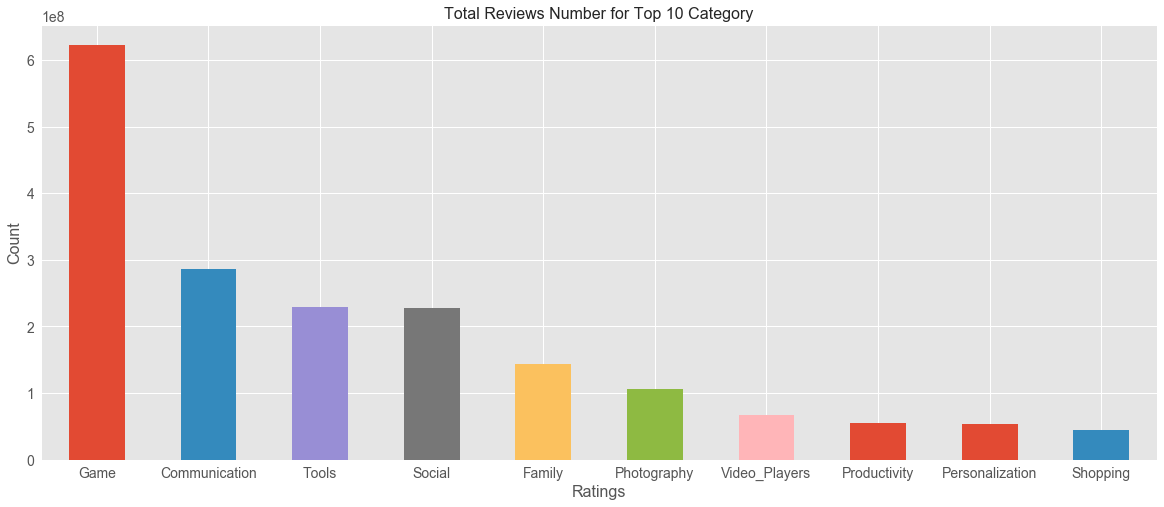

In [40]:
plt.figure(figsize=(20,8))
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.ylabel('Count', fontsize=16)
plt.xlabel('Ratings', fontsize=16)
plt.title("Total Reviews Number for Top 10 Category", fontsize=16)
plt.xticks(rotation=0);

The most rated category is '**Game**' which has more than** 600 million reviews** in total. Game, Communication, Social and Tools have more than **200 million reviews**.

**Let's review Size column**

In [41]:
df['Size'].value_counts().head(10)

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
15M                    163
17M                    146
26M                    142
16M                    137
19M                    130
Name: Size, dtype: int64

The App size varies but the top ten can be seen above. We can argue that most common Apps' size varies between **11MB and 26 MB**, if we ignore the 'Varies with device'. 

**Let's check Type now**

In [42]:
df['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

There are only **756** apps are paid Apps  and the rest are free.

In [43]:
df['Price'] = df['Price'].map(lambda x: re.sub(r"[^\w\.]", "", x)) #remove $ from the price

In [44]:
type(df['Price'][0])

str

We need to convert string into float

In [45]:
df['Price'] = df["Price"].map(lambda x: float(x))

In [46]:
df['Price'].mean()

1.0992990992856289

The average charge for paid Apps is **$1.01. ** 

In [47]:
df.loc[df[['Price']].idxmax()]

,App,App_length,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,IM Rich Trump Edition,4,Lifestyle,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


The most expensive App is IM Rich Trump which is **$400** and it has been installed more than **10 thousand times.**.People have paid **400 thousads dollars**[](http://) so far for it.

In [48]:
df_paid = df[df['Price']>50]

In [49]:
df_paid.groupby('App')[['Price']].mean().sort_values(by='Price', ascending=False)

,Price
App,
IM Rich Trump Edition,400.00
IM Rich,399.99
I Am Rich Plus,399.99
Most Expensive App H,399.99
IM RichEu Sou Ricoأنا غني我很有錢,399.99
I Am RichPremium,399.99
I Am Rich Pro Plus,399.99
I Am Rich Premium,399.99
I Am Rich Pro,399.99


The Apps more than** $50**  can be seen above. 

In [50]:
df_paid[['App', 'Genres', 'Price', 'Installs']].sort_values(by='Price', ascending=False)

,App,Genres,Price,Installs
4367,IM Rich Trump Edition,Lifestyle,400.00,"10,000+"
5359,I Am RichPremium,Finance,399.99,"5,000+"
5356,I Am Rich Premium,Finance,399.99,"50,000+"
5373,I Am Rich Pro Plus,Finance,399.99,"1,000+"
5369,I Am Rich,Finance,399.99,"5,000+"
5364,I Am Rich Most Expensive App,Finance,399.99,"1,000+"
5362,I Am Rich Pro,Entertainment,399.99,"5,000+"
5358,I Am Rich,Finance,399.99,"1,000+"
9934,IM RichEu Sou Ricoأنا غني我很有錢,Lifestyle,399.99,0+
5354,I Am Rich Plus,Entertainment,399.99,"10,000+"


As we can see many people are willing to pay **some good money** for some Apps in certain categories such as **Finance, LifeStyle and Entertainment.**

We wanted to get basic insights from the App Data we have. I hope you enjoyed my basic findings. Thank you.